In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [6]:
#normalize the image to the range of 0 to 1 
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [7]:
#one-hot encoding
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
#function to create a model
def create_model(initializer=None , dropout_rate=0.0 , regularizer=None):
    model=Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(512,activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(256,activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dropout(dropout_rate),        
        Dense(128,activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(10,activation='softmax')
    ])
    return model

In [10]:
baseline_model=create_model()
baseline_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
baseline_history=baseline_model.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-30 15:17:16.615690: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2460 - loss: 2.0623 - val_accuracy: 0.3448 - val_loss: 1.8393
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3534 - loss: 1.8113 - val_accuracy: 0.3730 - val_loss: 1.7597
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3933 - loss: 1.7040 - val_accuracy: 0.3909 - val_loss: 1.6962
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4154 - loss: 1.6427 - val_accuracy: 0.4175 - val_loss: 1.6352
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4316 - loss: 1.6002 - val_accuracy: 0.4345 - val_loss: 1.6013
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4498 - loss: 1.5627 - val_accuracy: 0.4463 - val_loss: 1.5641
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4520 - loss: 1.5332 - val_accuracy: 0.4433 - val_loss: 1.5641
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4711 - loss: 1.4998 - val_accuracy: 0.

In [13]:
#evaluate the model
test_loss,test_accuracy=baseline_model.evaluate(x_test,y_test,verbose=2)
print(f'baseline model Test accuracy{test_accuracy:4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4982 - loss: 1.4186
baseline model Test accuracy0.498200


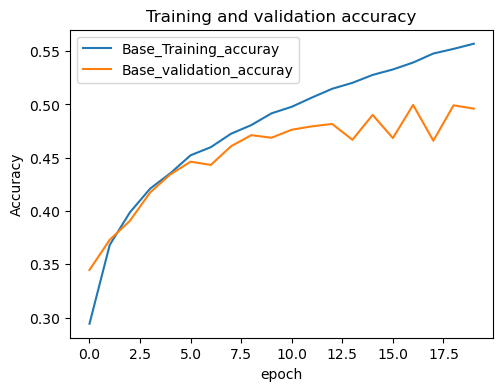

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(baseline_history.history['accuracy'],label='Base_Training_accuray')
plt.plot(baseline_history.history['val_accuracy'],label='Base_validation_accuray')
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()


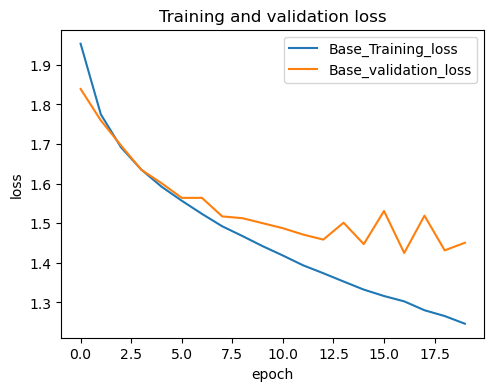

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(baseline_history.history['loss'],label='Base_Training_loss')
plt.plot(baseline_history.history['val_loss'],label='Base_validation_loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [19]:
#xavier initializtion 
from tensorflow.keras.initializers import GlorotUniform
xavier_model=create_model(initializer=GlorotUniform())
xavier_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
xavier_history=xavier_model.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2551 - loss: 2.0591 - val_accuracy: 0.3571 - val_loss: 1.8109
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3749 - loss: 1.7693 - val_accuracy: 0.3928 - val_loss: 1.7301
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3992 - loss: 1.6960 - val_accuracy: 0.4108 - val_loss: 1.6726
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4235 - loss: 1.6255 - val_accuracy: 0.4148 - val_loss: 1.6517
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4455 - loss: 1.5733 - val_accuracy: 0.4319 - val_loss: 1.6133
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4529 - loss: 1.5426 - val_accuracy: 0.4121 - val_loss: 1.6462
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4642 - loss: 1.5164 - val_accuracy: 0.4549 - val_loss: 1.5444
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4769 - loss: 1.4777 - val_accuracy: 0.

In [21]:
#evaluate the model
test_loss,test_accuracy=xavier_model.evaluate(x_test,y_test,verbose=2)
print(f'xavier model Test accuracy{test_accuracy:4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4984 - loss: 1.4130
xavier model Test accuracy0.498400


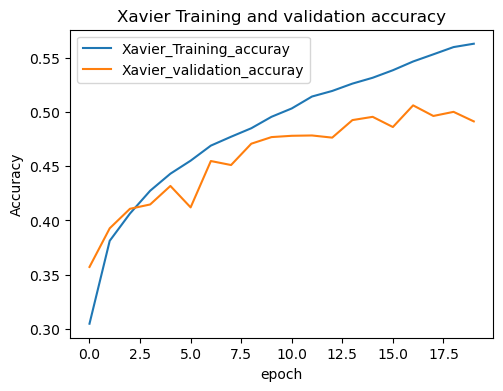

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['accuracy'],label='Xavier_Training_accuray')
plt.plot(xavier_history.history['val_accuracy'],label='Xavier_validation_accuray')
plt.title('Xavier Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()


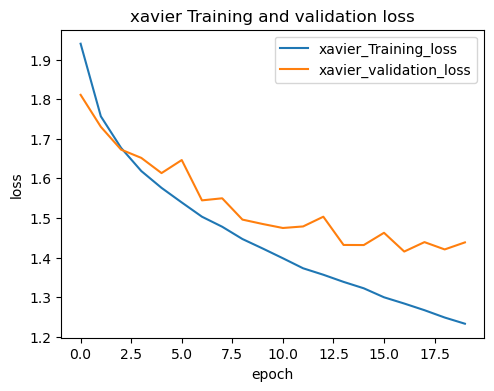

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['loss'],label='xavier_Training_loss')
plt.plot(xavier_history.history['val_loss'],label='xavier_validation_loss')
plt.title('xavier Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [9]:
from tensorflow.keras.initializers import HeNormal
kaiming_model = create_model(initializer=HeNormal())
kaiming_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
kaiming_history = kaiming_model.fit(x_train,y_train,epochs=33,batch_size=64,validation_split=0.2)

test_loss,test_accuracy = kaiming_model.evaluate(x_test,y_test,verbose=2)
print(f' Kaiming Model Test Accuracy: {test_accuracy:.4f}')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-12 11:33:29.940897: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2589 - loss: 2.0517 - val_accuracy: 0.3508 - val_loss: 1.8075
Epoch 2/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3715 - loss: 1.7694 - val_accuracy: 0.3890 - val_loss: 1.7262
Epoch 3/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4023 - loss: 1.6859 - val_accuracy: 0.3989 - val_loss: 1.6875
Epoch 4/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4272 - loss: 1.6186 - val_accuracy: 0.4219 - val_loss: 1.6361
Epoch 5/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4429 - loss: 1.5744 - val_accuracy: 0.4149 - val_loss: 1.6342
Epoch 6/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4544 - loss: 1.5344 - val_accuracy: 0.4452 - val_loss: 1.5653
Epoch 7/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4701 - loss: 1.5033 - val_accuracy: 0.4529 - val_loss: 1.5511
Epoch 8/33
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4762 - loss: 1.4790 - val_accuracy: 0.

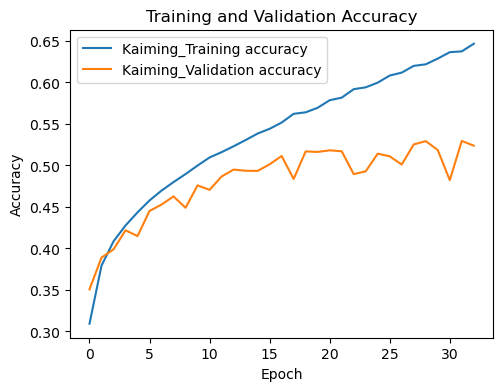

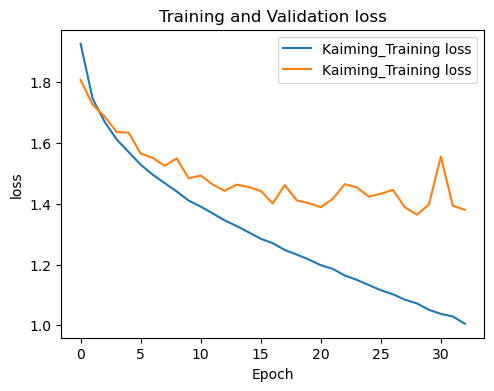

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['accuracy'],label='Kaiming_Training accuracy')
plt.plot(kaiming_history.history['val_accuracy'],label='Kaiming_Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['loss'],label='Kaiming_Training loss')
plt.plot(kaiming_history.history['val_loss'],label='Kaiming_Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [15]:
dropout_model= create_model(dropout_rate=0.5)
dropout_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
dropout_history=dropout_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1256 - loss: 2.3488 - val_accuracy: 0.2497 - val_loss: 2.1522
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1747 - loss: 2.1926 - val_accuracy: 0.2738 - val_loss: 2.0619
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2040 - loss: 2.1261 - val_accuracy: 0.3043 - val_loss: 2.0019
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2264 - loss: 2.0756 - val_accuracy: 0.3044 - val_loss: 1.9694
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2441 - loss: 2.0395 - val_accuracy: 0.3185 - val_loss: 1.9301
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2528 - loss: 2.0054 - val_accuracy: 0.3255 - val_loss: 1.9098
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2662 - loss: 1.9817 - val_accuracy: 0.3307 - val_loss: 1.8813
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2800 - loss: 1.9560 - val_accuracy: 0.

In [16]:
test_loss,test_accuracy=dropout_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4044 - loss: 1.6725
Test Accuracy :0.4044


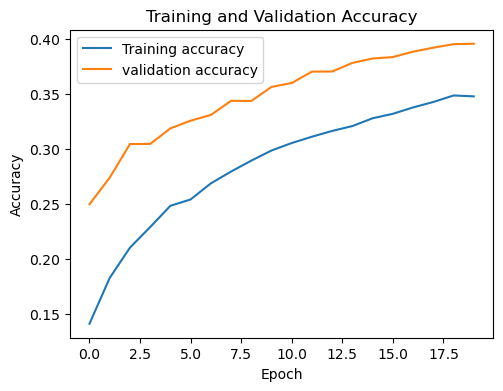

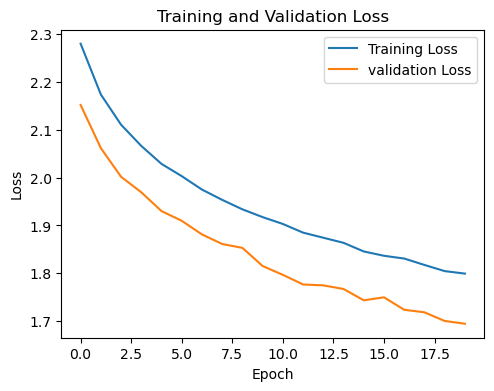

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(dropout_history.history['accuracy'],label='Training accuracy')
plt.plot(dropout_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(dropout_history.history['loss'],label='Training Loss')
plt.plot(dropout_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [21]:
from tensorflow.keras.regularizers import l2
l2_model=create_model(regularizer=l2(0.001))
l2_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
l2_history=l2_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2396 - loss: 3.5128 - val_accuracy: 0.3232 - val_loss: 3.2756
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3485 - loss: 3.2165 - val_accuracy: 0.3432 - val_loss: 3.1982
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3760 - loss: 3.1312 - val_accuracy: 0.3339 - val_loss: 3.2256
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3960 - loss: 3.0599 - val_accuracy: 0.3849 - val_loss: 3.0629
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4080 - loss: 3.0038 - val_accuracy: 0.3914 - val_loss: 3.0250
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4209 - loss: 2.9611 - val_accuracy: 0.3777 - val_loss: 3.0381
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4354 - loss: 2.9016 - val_accuracy: 0.4169 - val_loss: 2.9479
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4403 - loss: 2.8689 - val_accu

In [22]:
test_loss,test_accuracy=l2_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 2ms/step - accuracy: 0.4827 - loss: 2.5686
Test Accuracy :0.4827


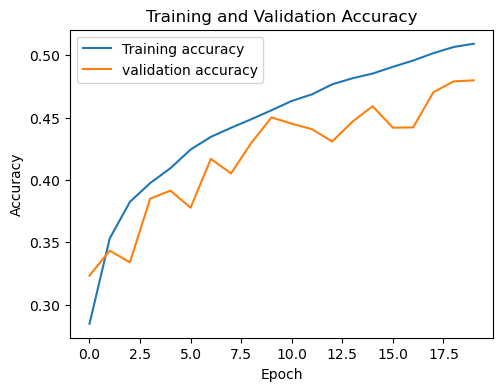

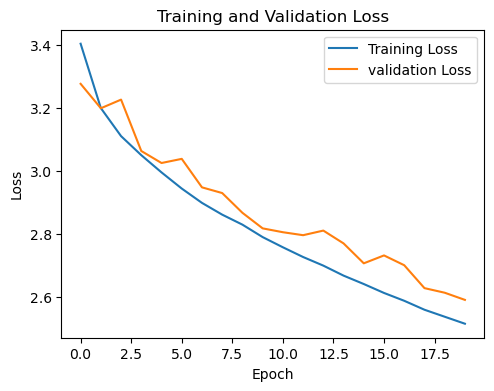

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) 
plt.plot(l2_history.history['accuracy'],label='Training accuracy')
plt.plot(l2_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(l2_history.history['loss'],label='Training Loss')
plt.plot(l2_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()